In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199775 sha256=2cb59bf92b3aab2948b4eb89d86fe7b832d351af060303f8370a4dc4bf980867
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import fasttext as ft
import plotly.express as px
import plotly.io as pio
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from textblob import TextBlob
from IPython.display import display
import string
import matplotlib.pyplot as plt


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/BRAC UNIVERSITY/11th semester/431/billboard_2012_to_2022_top_100_song_lyrics.csv')


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Top100Year    1100 non-null   int64 
 1   SongTitle     1100 non-null   object
 2   Artist        1100 non-null   object
 3   LyricsStatus  1100 non-null   bool  
 4   Lyrics        962 non-null    object
 5   ReleaseYear   1100 non-null   object
 6   Genre         1100 non-null   object
dtypes: bool(1), int64(1), object(5)
memory usage: 52.8+ KB


In [ ]:
dataset_1 = dataset[dataset['LyricsStatus'] == True]
dataset_1.drop('LyricsStatus', inplace=True, axis=1)
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 962 entries, 0 to 1099
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Top100Year   962 non-null    int64 
 1   SongTitle    962 non-null    object
 2   Artist       962 non-null    object
 3   Lyrics       962 non-null    object
 4   ReleaseYear  962 non-null    object
 5   Genre        962 non-null    object
dtypes: int64(1), object(5)
memory usage: 52.6+ KB


<ipython-input-21-4204e58a4533>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_1.drop('LyricsStatus', inplace=True, axis=1)


In [ ]:
language = list()
ft_model = ft.load_model("/content/drive/MyDrive/BRAC UNIVERSITY/11th semester/431/lid.176.ftz")
def fasttext_language_predict(text, model = ft_model):
    text = text.replace('\n', " ")
    prediction = model.predict([text])
    return prediction
for lyrics in dataset_1['Lyrics']:
    pred = fasttext_language_predict(lyrics)
    language.append(pred[0][0][0][-2:])

dataset_1.loc[:,'Language'] = language
dataset_1

<ipython-input-22-d446d8426cda>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_1.loc[:,'Language'] = language


,Top100Year,SongTitle,Artist,Lyrics,ReleaseYear,Genre,Language
0,2012,Call Me Maybe,Carly Rae Jepsen,"I threw a wish in the well\nDon't ask me, I'll...",2012,"R&B/Soul, Pop",en
1,2012,Payphone,Maroon 5 Featuring Wiz Khalifa,I'm at a payphone trying to call home\nAll of ...,2012,"R&B/Soul, Pop",en
2,2012,Somebody That I Used To Know,Gotye Featuring Kimbra,Now and then I think of when we were together\...,2011,"R&B/Soul, Pop",en
3,2012,Wide Awake,Katy Perry,I'm wide awake\nI'm wide awake\nI'm wide awake...,2012,"R&B/Soul, Pop, UK R&B",en
4,2012,Where Have You Been,Rihanna,"I've been everywhere, man\nLooking for someone...",2011,"Dance-pop, R&B/Soul, Electro house, Pop, UK R&B",en
...,...,...,...,...,...,...,...
1095,2022,N95,Kendrick Lamar,"Hello, new world, all the boys and girls\nI go...",2022,"Pop, Country",en
1096,2022,Love Me More,Sam Smith,Have you ever felt like being somebody else?\n...,2022,"R&B/Soul, Pop",en
1097,2022,New Truck,Dylan Scott,I need a new truck\nThere ain't nothing wrong ...,2022,"R&B/Soul, Pop",en
1098,2022,She's All I Wanna Be,Tate McRae,You want the girl with the small waist\nAnd th...,2022,"R&B/Soul, Pop",en


In [ ]:
dataset_1['Language'].value_counts()

en    928
es     29
ko      3
pt      1
hu      1
Name: Language, dtype: int64

In [ ]:
dataset_en = dataset_1[dataset_1['Language']=='en']
dataset_en

,Top100Year,SongTitle,Artist,Lyrics,ReleaseYear,Genre,Language
0,2012,Call Me Maybe,Carly Rae Jepsen,"I threw a wish in the well\nDon't ask me, I'll...",2012,"R&B/Soul, Pop",en
1,2012,Payphone,Maroon 5 Featuring Wiz Khalifa,I'm at a payphone trying to call home\nAll of ...,2012,"R&B/Soul, Pop",en
2,2012,Somebody That I Used To Know,Gotye Featuring Kimbra,Now and then I think of when we were together\...,2011,"R&B/Soul, Pop",en
3,2012,Wide Awake,Katy Perry,I'm wide awake\nI'm wide awake\nI'm wide awake...,2012,"R&B/Soul, Pop, UK R&B",en
4,2012,Where Have You Been,Rihanna,"I've been everywhere, man\nLooking for someone...",2011,"Dance-pop, R&B/Soul, Electro house, Pop, UK R&B",en
...,...,...,...,...,...,...,...
1094,2022,F.N.F. (Let's Go),Hitkidd & Glorilla,"HitKidd, what it do man?\nGloRilla, mmm-hmm\nL...",2022,"Pop, Country",en
1095,2022,N95,Kendrick Lamar,"Hello, new world, all the boys and girls\nI go...",2022,"Pop, Country",en
1096,2022,Love Me More,Sam Smith,Have you ever felt like being somebody else?\n...,2022,"R&B/Soul, Pop",en
1097,2022,New Truck,Dylan Scott,I need a new truck\nThere ain't nothing wrong ...,2022,"R&B/Soul, Pop",en


In [ ]:
dataset_en.drop_duplicates(subset = ['SongTitle'], inplace=True)

<ipython-input-25-746ed0e77f9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_en.drop_duplicates(subset = ['SongTitle'], inplace=True)


In [ ]:
def text_cleansing(data):
    data = data.str.replace("[\(\[].*?[\)\]]", '')
    data = data.str.replace("\n", ' ')
    data = data.str.lower()
    data = data.str.replace('[{}]'.format(string.punctuation), '')
    return data

dataset_en.loc[:,'rem_sp_char'] = text_cleansing(dataset_en.loc[:,'Lyrics'])
dataset_en

<ipython-input-26-bb719899bdbd>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data = data.str.replace("[\(\[].*?[\)\]]", '')
<ipython-input-26-bb719899bdbd>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data = data.str.replace('[{}]'.format(string.punctuation), '')
<ipython-input-26-bb719899bdbd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_en.loc[:,'rem_sp_char'] = text_cleansing(dataset_en.loc[:,'Lyrics'])


,Top100Year,SongTitle,Artist,Lyrics,ReleaseYear,Genre,Language,rem_sp_char
0,2012,Call Me Maybe,Carly Rae Jepsen,"I threw a wish in the well\nDon't ask me, I'll...",2012,"R&B/Soul, Pop",en,i threw a wish in the well dont ask me ill nev...
1,2012,Payphone,Maroon 5 Featuring Wiz Khalifa,I'm at a payphone trying to call home\nAll of ...,2012,"R&B/Soul, Pop",en,im at a payphone trying to call home all of my...
2,2012,Somebody That I Used To Know,Gotye Featuring Kimbra,Now and then I think of when we were together\...,2011,"R&B/Soul, Pop",en,now and then i think of when we were together ...
3,2012,Wide Awake,Katy Perry,I'm wide awake\nI'm wide awake\nI'm wide awake...,2012,"R&B/Soul, Pop, UK R&B",en,im wide awake im wide awake im wide awake yeah...
4,2012,Where Have You Been,Rihanna,"I've been everywhere, man\nLooking for someone...",2011,"Dance-pop, R&B/Soul, Electro house, Pop, UK R&B",en,ive been everywhere man looking for someone so...
...,...,...,...,...,...,...,...,...
1094,2022,F.N.F. (Let's Go),Hitkidd & Glorilla,"HitKidd, what it do man?\nGloRilla, mmm-hmm\nL...",2022,"Pop, Country",en,hitkidd what it do man glorilla mmmhmm let go ...
1095,2022,N95,Kendrick Lamar,"Hello, new world, all the boys and girls\nI go...",2022,"Pop, Country",en,hello new world all the boys and girls i got s...
1096,2022,Love Me More,Sam Smith,Have you ever felt like being somebody else?\n...,2022,"R&B/Soul, Pop",en,have you ever felt like being somebody else fe...
1097,2022,New Truck,Dylan Scott,I need a new truck\nThere ain't nothing wrong ...,2022,"R&B/Soul, Pop",en,i need a new truck there aint nothing wrong wi...


In [ ]:
def remove_stopwords(text):
    clean_text = list()
    nltk.download('punkt')
    nltk.download('stopwords')

    words=["yeah","ya","na","wan","uh","gon","ima","mm","uhhuh","bout","em","nigga",
           "niggas","got","ta","lil","ol","hey","oooh","ooh","oh","youre","dont",
           "im","youve","ive","theres","ill","yaka","lalalala","la","da","di","yuh",
          "shawty","oohooh","shoorah","mmmmmm","ook","bidibambambambam","shh","bro",
           "ho","aint","cant","know","bambam","shitll","tonka",'i', 'me', 'my', 'myself', 'we', 'our',
          'ours', 'ourselves', 'you', "you're", "you've", "you'll",
          "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him',
          'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it',
          "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
          'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these',
          'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have',
          'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the',
          'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
          'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through',
          'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
          'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then',
          'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any',
          'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no',
          'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's',
          't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now',
          'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn',
          "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
          "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't",
          'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn',
          "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn',
          "wouldn't",'or', 'm', 'ma', 'ours', 'against', 'nor', "it's", 'o',
          'wasn', 'hasn', 'my', 'had', 'didn', 'isn', 'did', 'aren', 'those', 'than',
          "mustn't", "you've", 'to', 'she', 'having', "haven't", 'into', 't', 'll',
          'himself', 'do', "that'll", 'so', 'of', 'on', 'very', 'for', 'out', 'were',
          'should', 'they', 'ain', "should've", 'you', "didn't", 'yours', 'was', 'our',
          'can', 'myself', "shouldn't", 'have', 'up', 'mightn', "you'll", 'any',
          'itself', 'hadn', 'him', 'doesn', 'weren', 'y', 'being', "don't", 'them',
          'are','and', 'that', 'your', 'yourself', 'their', 'some', 'ourselves', 've',
          'doing', 'been', 'shouldn', 'yourselves', "mightn't", 'most', 'because',
          'few', 'wouldn', "you'd", 'through', "you're", 'themselves', 'an', 'if',
          "wouldn't", 'its', 'other', "won't", "wasn't", "she's", 'we', 'shan',
          "weren't",'don',"hadn't", 'this', 'off', 'while', 'a', 'haven', 'her',
          'theirs', 'all', "hasn't", "doesn't", 'about', 'then', 'by','such', 'but',
          'until', 'each', 'there', "aren't", 'with', 'not', "shan't", 'hers', 'it',
          'too', 'i', 'at', 'is', 'as', 'me', 'herself', 's', 'the', 'where', 'am',
          'has', 'over', "couldn't", 'when', 'does', 'mustn','re', 'no', 'in', 'who',
          'd', 'own', 'he', 'be', "isn't", 'his', 'these', 'same', 'whom', 'will',
          'needn','couldn', 'from']
    ignore= (stopwords.words('english') + words)

    for i in text:
        words = nltk.word_tokenize(i)
        for element in ignore:
            words = list(filter(lambda x: x!= element and len(x) > 1, words))
        lyric = " ".join(words)
        clean_text.append(lyric)

    return clean_text

dataset_en['LyricsClean'] = remove_stopwords(dataset_en['rem_sp_char'])
dataset_en['LyricsClean'] = remove_stopwords(dataset_en['rem_sp_char'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-27-0cb521839bb4>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_en['LyricsClean'] = remove_stopwords(dataset_en['rem_sp_char'])
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-27-0cb521839bb4>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [ ]:
dataset_en['LyricsClean']

0       threw wish well ask never tell looked fell way...
1       payphone trying call home change spent times g...
2       think together like said felt happy could die ...
3       wide awake wide awake wide awake dark falling ...
4       everywhere man looking someone someone please ...
                              ...                        
1094    hitkidd man glorilla mmmhmm let go woo woo gan...
1095    hello new world boys girls true stories tell b...
1096    ever felt like somebody else feeling like mirr...
1097    need new truck nothing wrong mine forty someth...
1098    want girl small waist perfect smile someone wh...
Name: LyricsClean, Length: 907, dtype: object

In [ ]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

comp_score = []
sentiment = []

for i in dataset_en.loc[:,'LyricsClean']:
    sentiment.append(sia.polarity_scores(i))
dataset_en.loc[:,'sent_scores'] = sentiment
dataset_en.loc[:,'comp_score'] = dataset_en.loc[:,'sent_scores'].apply(lambda x: x['compound'])
dataset_en.loc[:,'sentiment'] = dataset_en.loc[:,'comp_score'].apply(lambda x: 'Positive' if x>=0.5 else 'Negative' if x<=-0.5 else 'Neutral')
dataset_en

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
<ipython-input-16-fb9447fcd61e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_en.loc[:,'sent_scores'] = sentiment
<ipython-input-16-fb9447fcd61e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_en.loc[:,'comp_score'] = dataset_en.loc[:,'sent_scores'].apply(lambda x: x['compound'])
<ipython-input-16-fb9447fcd61e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,Top100Year,SongTitle,Artist,Lyrics,ReleaseYear,Genre,Language,rem_sp_char,LyricsClean,sent_scores,comp_score,sentiment
0,2012,Call Me Maybe,Carly Rae Jepsen,"I threw a wish in the well\nDon't ask me, I'll...",2012,"R&B/Soul, Pop",en,i threw a wish in the well dont ask me ill nev...,threw wish well ask never tell looked fell way...,"{'neg': 0.321, 'neu': 0.567, 'pos': 0.112, 'co...",-0.9936,Negative
1,2012,Payphone,Maroon 5 Featuring Wiz Khalifa,I'm at a payphone trying to call home\nAll of ...,2012,"R&B/Soul, Pop",en,im at a payphone trying to call home all of my...,payphone trying call home change spent times g...,"{'neg': 0.193, 'neu': 0.565, 'pos': 0.242, 'co...",0.9432,Positive
2,2012,Somebody That I Used To Know,Gotye Featuring Kimbra,Now and then I think of when we were together\...,2011,"R&B/Soul, Pop",en,now and then i think of when we were together ...,think together like said felt happy could die ...,"{'neg': 0.094, 'neu': 0.536, 'pos': 0.37, 'com...",0.9923,Positive
3,2012,Wide Awake,Katy Perry,I'm wide awake\nI'm wide awake\nI'm wide awake...,2012,"R&B/Soul, Pop, UK R&B",en,im wide awake im wide awake im wide awake yeah...,wide awake wide awake wide awake dark falling ...,"{'neg': 0.148, 'neu': 0.693, 'pos': 0.159, 'co...",0.7723,Positive
4,2012,Where Have You Been,Rihanna,"I've been everywhere, man\nLooking for someone...",2011,"Dance-pop, R&B/Soul, Electro house, Pop, UK R&B",en,ive been everywhere man looking for someone so...,everywhere man looking someone someone please ...,"{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9704,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
1094,2022,F.N.F. (Let's Go),Hitkidd & Glorilla,"HitKidd, what it do man?\nGloRilla, mmm-hmm\nL...",2022,"Pop, Country",en,hitkidd what it do man glorilla mmmhmm let go ...,hitkidd man glorilla mmmhmm let go woo woo gan...,"{'neg': 0.192, 'neu': 0.542, 'pos': 0.266, 'co...",0.9360,Positive
1095,2022,N95,Kendrick Lamar,"Hello, new world, all the boys and girls\nI go...",2022,"Pop, Country",en,hello new world all the boys and girls i got s...,hello new world boys girls true stories tell b...,"{'neg': 0.249, 'neu': 0.628, 'pos': 0.123, 'co...",-0.9940,Negative
1096,2022,Love Me More,Sam Smith,Have you ever felt like being somebody else?\n...,2022,"R&B/Soul, Pop",en,have you ever felt like being somebody else fe...,ever felt like somebody else feeling like mirr...,"{'neg': 0.178, 'neu': 0.409, 'pos': 0.413, 'co...",0.9935,Positive
1097,2022,New Truck,Dylan Scott,I need a new truck\nThere ain't nothing wrong ...,2022,"R&B/Soul, Pop",en,i need a new truck there aint nothing wrong wi...,need new truck nothing wrong mine forty someth...,"{'neg': 0.051, 'neu': 0.677, 'pos': 0.272, 'co...",0.9911,Positive


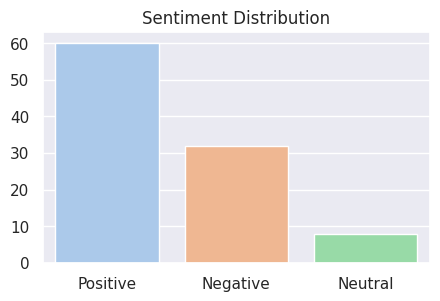

None

In [ ]:
positive_percentage = (dataset_en['sentiment'] == 'Positive').sum() / len(dataset_en) * 100
negative_percentage = (dataset_en['sentiment'] == 'Negative').sum() / len(dataset_en) * 100
neutral_percentage = (dataset_en['sentiment'] == 'Neutral').sum() / len(dataset_en) * 100

%matplotlib inline
sns.set(style="darkgrid")
plt.figure(figsize=(5,3 ))
colors = sns.color_palette("pastel")
sns.barplot(x=['Positive', 'Negative', 'Neutral'], y=[positive_percentage, negative_percentage, neutral_percentage], palette=colors)
plt.title('Sentiment Distribution')


display(plt.show())

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

train_df, test_df = train_test_split(dataset_en, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['LyricsClean'])
X_test_tfidf = tfidf_vectorizer.transform(test_df['LyricsClean'])

y_train = train_df['sentiment']
y_test = test_df['sentiment']


nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

predictions = nb_classifier.predict(X_test_tfidf)


accuracy_vader = accuracy_score(y_test, predictions)

class_report = classification_report(y_test, predictions,zero_division=1)

print(f"Naive Bayes Classifier Accuracy: {accuracy_vader * 100:.2f}%")



Naive Bayes Classifier Accuracy: 60.44%


### TEXTBlob

In [ ]:
from textblob import TextBlob

sentiment_scores = []
sentiment_labels = []


for text in dataset_en['LyricsClean']:

    blob = TextBlob(text)


    polarity_score = blob.sentiment.polarity


    if polarity_score > 0:
        sentiment_label = 'Positive'
    elif polarity_score < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'


    sentiment_scores.append(polarity_score)
    sentiment_labels.append(sentiment_label)

dataset_en['sentiment_score'] = sentiment_scores

dataset_en['sentiment'] = sentiment_labels

dataset_en


<ipython-input-29-1d8b1cd314aa>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_en['sentiment_score'] = sentiment_scores
<ipython-input-29-1d8b1cd314aa>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_en['sentiment'] = sentiment_labels


,Top100Year,SongTitle,Artist,Lyrics,ReleaseYear,Genre,Language,rem_sp_char,LyricsClean,sentiment_score,sentiment
0,2012,Call Me Maybe,Carly Rae Jepsen,"I threw a wish in the well\nDon't ask me, I'll...",2012,"R&B/Soul, Pop",en,i threw a wish in the well dont ask me ill nev...,threw wish well ask never tell looked fell way...,-0.348661,Negative
1,2012,Payphone,Maroon 5 Featuring Wiz Khalifa,I'm at a payphone trying to call home\nAll of ...,2012,"R&B/Soul, Pop",en,im at a payphone trying to call home all of my...,payphone trying call home change spent times g...,-0.046329,Negative
2,2012,Somebody That I Used To Know,Gotye Featuring Kimbra,Now and then I think of when we were together\...,2011,"R&B/Soul, Pop",en,now and then i think of when we were together ...,think together like said felt happy could die ...,0.222424,Positive
3,2012,Wide Awake,Katy Perry,I'm wide awake\nI'm wide awake\nI'm wide awake...,2012,"R&B/Soul, Pop, UK R&B",en,im wide awake im wide awake im wide awake yeah...,wide awake wide awake wide awake dark falling ...,-0.007840,Negative
4,2012,Where Have You Been,Rihanna,"I've been everywhere, man\nLooking for someone...",2011,"Dance-pop, R&B/Soul, Electro house, Pop, UK R&B",en,ive been everywhere man looking for someone so...,everywhere man looking someone someone please ...,0.225000,Positive
...,...,...,...,...,...,...,...,...,...,...,...
1094,2022,F.N.F. (Let's Go),Hitkidd & Glorilla,"HitKidd, what it do man?\nGloRilla, mmm-hmm\nL...",2022,"Pop, Country",en,hitkidd what it do man glorilla mmmhmm let go ...,hitkidd man glorilla mmmhmm let go woo woo gan...,0.125917,Positive
1095,2022,N95,Kendrick Lamar,"Hello, new world, all the boys and girls\nI go...",2022,"Pop, Country",en,hello new world all the boys and girls i got s...,hello new world boys girls true stories tell b...,-0.027775,Negative
1096,2022,Love Me More,Sam Smith,Have you ever felt like being somebody else?\n...,2022,"R&B/Soul, Pop",en,have you ever felt like being somebody else fe...,ever felt like somebody else feeling like mirr...,0.143333,Positive
1097,2022,New Truck,Dylan Scott,I need a new truck\nThere ain't nothing wrong ...,2022,"R&B/Soul, Pop",en,i need a new truck there aint nothing wrong wi...,need new truck nothing wrong mine forty someth...,0.077940,Positive


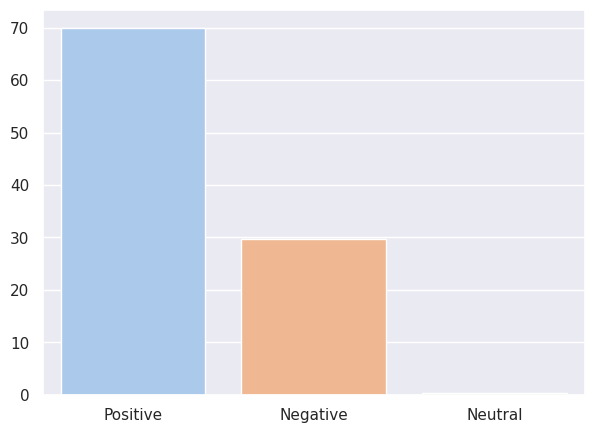

None

In [ ]:
import seaborn as sns

from IPython.display import display


positive_percentage = (dataset_en['sentiment'] == 'Positive').sum() / len(dataset_en) * 100
negative_percentage = (dataset_en['sentiment'] == 'Negative').sum() / len(dataset_en) * 100
neutral_percentage = (dataset_en['sentiment'] == 'Neutral').sum() / len(dataset_en) * 100


%matplotlib inline

sns.set(style="darkgrid")
plt.figure(figsize=(7, 5))


colors = sns.color_palette("pastel")

sns.barplot(x=['Positive', 'Negative', 'Neutral'], y=[positive_percentage, negative_percentage, neutral_percentage], palette=colors)

display(plt.show())

In [ ]:

train_df, test_df = train_test_split(dataset_en, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['LyricsClean'])
X_test_tfidf = tfidf_vectorizer.transform(test_df['LyricsClean'])

y_train = train_df['sentiment']
y_test = test_df['sentiment']

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

predictions = nb_classifier.predict(X_test_tfidf)


accuracy_blob = accuracy_score(y_test, predictions)


class_report = classification_report(y_test, predictions,zero_division=1)

print(f"Naive Bayes Classifier Accuracy: {accuracy_blob * 100:.2f}%")

Naive Bayes Classifier Accuracy: 66.48%


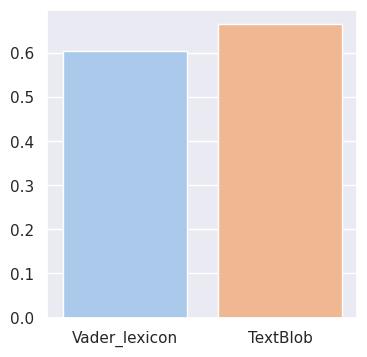

None

In [ ]:

accuracy_vader = accuracy_vader
accuracy_textblob = accuracy_blob

%matplotlib inline

sns.set(style="darkgrid")
plt.figure(figsize=(4, 4))

colors = sns.color_palette("pastel")

sns.barplot(x=['Vader_lexicon', 'TextBlob'], y=[accuracy_vader, accuracy_textblob], palette=colors)
display(plt.show())
